<a href="https://colab.research.google.com/github/SardarAmmer/DataScience-Projects-/blob/main/DEN_Task_5(ovies_Review_Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Step 1 & 2:   Loading and Checking few Rows
import pandas as pd
import seaborn as sbn
import matplotlib as plt
from google.colab import files
df = pd.read_csv('/content/IMDB Dataset.csv',quoting=3,on_bad_lines="skip")

print("Columns Name= ", df.columns.tolist())
print("\nFirst 5 Rows Data")
df.head()




Columns Name=  ['review', 'sentiment']

First 5 Rows Data


,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<b

Null Values=
 
review       0
sentiment    0
dtype: int64

Duplicate Values=
0
Graph For sentiment Values


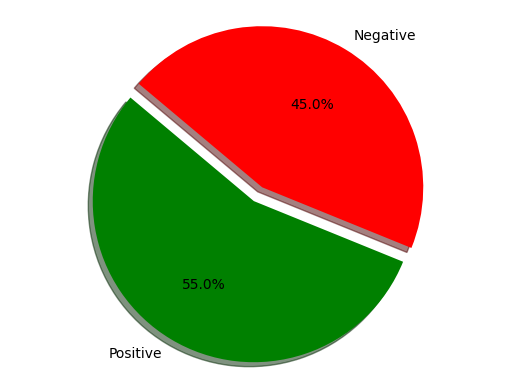

In [ ]:
# @title Default Step 3: Performing EDA

#checking null & duplicate values
print("Null Values=\n ")
null_values = df.isnull().sum()
print(null_values)
print("\nDuplicate Values=")
duplicate_values = df.duplicated().sum()
print(duplicate_values)

#Removing null and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#Ploting Pie Graph of dataset before any processing
print ("Graph For sentiment Values")
labels = ['Positive', 'Negative']
sizes = df['sentiment'].value_counts()
colors = ['green', 'red']
explode = (0.1, 0)
plt.pyplot.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.pyplot.axis('equal')
plt.pyplot.show()

In [ ]:
# @title Step 4: Data Preprocessing
import re
import nltk
import string
from nltk.corpus import stopwords

# Download
nltk.download('stopwords')

# Encodeing sentiment column
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# cleaning text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation & special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

#cleaning to review column
df['review_clean'] = df['review'].apply(clean_text)

# Show before & after
df[['review', 'review_clean', 'sentiment']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,,,,,,,,,,,,,,,,,,,,,,,,,,review,review_clean,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,may become comfortable uncomfortable viewingth...,1
"""Gamers: DR is not a fancy made movie",it's more like amateur video. Horrible magic effect,really fake fireball,terribly made dungeon,castle,village...... sword,axe,shield,robe,plate..... okok... everything. You will need about 10 minutes to adjust your expecting on visual,then you will get 105 minutes of fun.<br /><br />I'm from Hongkong and it's really hard to find RPers,none of my friends play RPG and I always fancy to be one of the character in the world of D&D. Watching Gamers: DR just show me what would it be like to be a gamer. You see rule books,dices,game set,"etc etc etc; You hear terms like """"fighter""""","""""wizard""""","""""hit point""""","""""level""""","""""character""""","""""flaming hand""""","""""Chaotic Evil"""".<br /><br />What RPG fancy me is that it let you do anything u want to",not bonded by software RPG. Gamers: DR provide the same element,you wont know what happen next and it probably just make you laugh to dead. The movie goes both gamers's real life as well as in the D&D world. You will hear the gamer cast the dice when the character in game take action,which make you feel you really participle in the game.<br /><br />I don't want to spoil anything,but in short,Gamers: DR is a must watch movie for RPG lovers. For people never play RPG game,"I'm sure you still get many fun from it.""",im sure still get many fun,1
"""First",let me just comment on what I liked about the movie. The special effects were fantastic,and very rarely did I feel like I was watching a video game. There,that is the last nice thing I have to say about this film. In fact,I would just like everyone reading this to take note that I can't even put into words how hard it was for me to write this review without swearing. <br /><br />I have innumerable complaints about the film,"but four major complaints jump to mind. My first major complaint has to do with the incredible cheesiness of the """"plot twist"""" (if you can call it that since most people probably saw it coming a mile away) where Lois's 5 year-old son turns out to be the super-powered child of Superman. When the crying super-child throws a piano at Lex's henchman to save his mother",I almost got up and left the theater. Singe

Train datashape: (241, 1283)
Test datashape: (61, 1283)


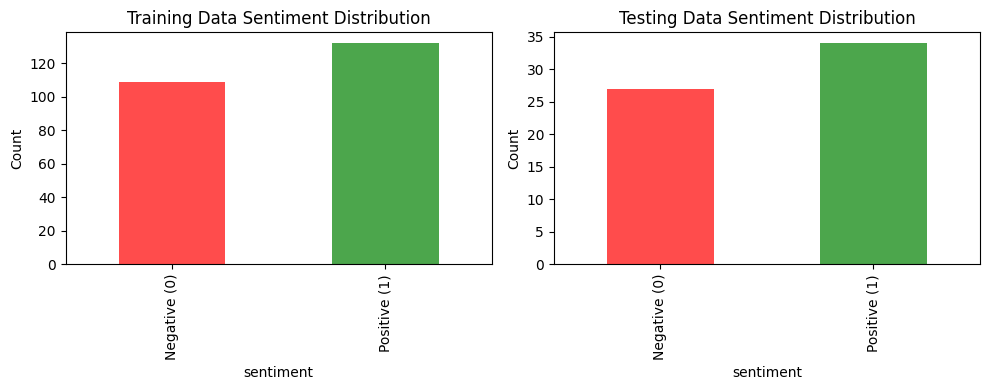

In [ ]:
# @title Step 5 & 6: Split Data + TF-IDF Vectorization + Graph
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


X = df['review_clean']
y = df['sentiment']

#Spliting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#TF-IDF Vectorization with 5000
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Train datashape:", X_train_tfidf.shape)
print("Test datashape:", X_test_tfidf.shape)

# graphical representation of train vs test
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().sort_index().plot(
    kind='bar', ax=ax[0], color=['red', 'green'], alpha=0.7
)
ax[0].set_title("Training Data Sentiment Distribution")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Negative (0)", "Positive (1)"])
ax[0].set_ylabel("Count")

y_test.value_counts().sort_index().plot(
    kind='bar', ax=ax[1], color=['red', 'green'], alpha=0.7
)
ax[1].set_title("Testing Data Sentiment Distribution")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Negative (0)", "Positive (1)"])
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


✅ Model Evaluation (Multinomial Naive Bayes)
Accuracy: 0.6066

Classification Report:
              precision    recall  f1-score   support

    Negative       0.59      0.37      0.45        27
    Positive       0.61      0.79      0.69        34

    accuracy                           0.61        61
   macro avg       0.60      0.58      0.57        61
weighted avg       0.60      0.61      0.59        61



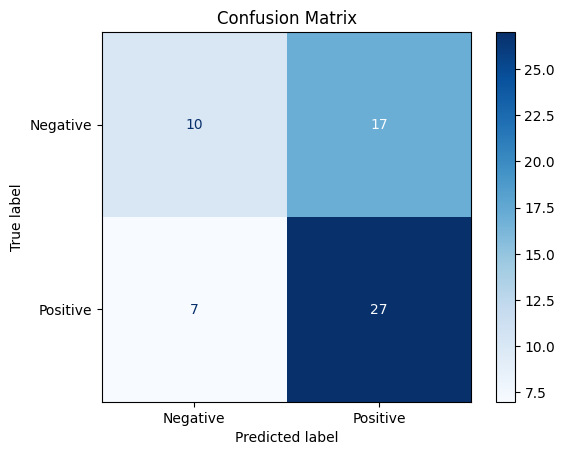

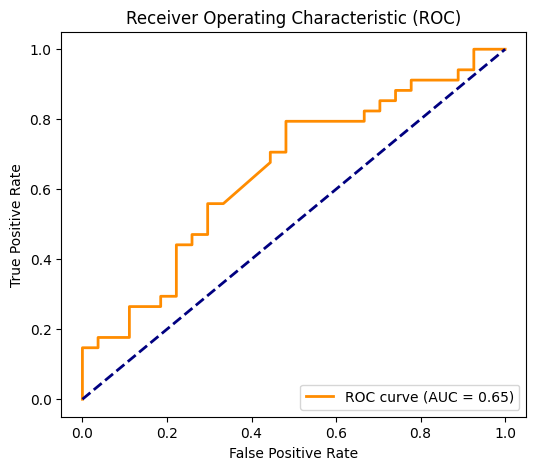

In [ ]:
# @title Step 7 & 8: Model Training and Evaluation


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

#Train model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

#Predictions
y_pred = nb_model.predict(X_test_tfidf)
y_pred_prob = nb_model.predict_proba(X_test_tfidf)[:, 1]

#Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
print("✅ Model Evaluation (Multinomial Naive Bayes)")
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()



Top 50 words for Negative sentiment:
['kill', 'positive', 'least', 'boring', 'never', 'onbr', 'almost', 'thingbr', 'know', 'far', 'dont', 'recommend', 'many', 'wasnt', 'youll', 'song', 'job', 'cynical', 'dull', 'bernon', 'disappointment', 'time', 'good', 'book', 'god', 'might', 'want', 'anything', 'im', 'works', 'could', 'give', 'minutes', 'much', 'thing', 'bad', 'avoid', 'worst', 'though', 'didnt', 'word', 'even', 'really', 'better', 'like', 'would', 'one', 'movie', 'film', 'br']

Top 50 words for Positive sentiment:
['recommended', 'highly', 'much', 'needs', 'fun', 'great', 'friendship', 'seriously', 'laven', 'atmospheric', 'well', 'everything', 'funny', 'never', 'people', 'films', 'watch', 'themes', 'im', 'wow', 'go', 'dont', 'like', 'come', 'watching', 'recommend', 'around', 'enjoy', 'see', 'disappoint', 'right', 'worth', 'remember', 'rating', 'first', 'make', 'pretty', 'many', 'sure', 'better', 'one', 'little', 'movies', 'best', 'still', 'might', 'thats', 'movie', 'film', 'br']


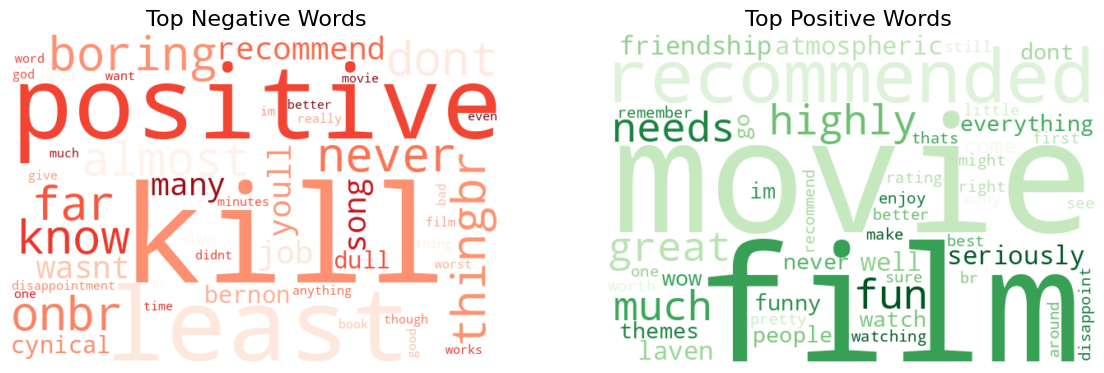


✅ Model and Vectorizer saved successfully!

Review: The movie was absolutely fantastic! Great acting and story.
Predicted Sentiment: Positive 😀 (Confidence: 54.27%)

Review: Worst movie I have ever seen. Total waste of time.
Predicted Sentiment: Negative 😡 (Confidence: 55.02%)

Review: It was okay, not the best but not the worst either.
Predicted Sentiment: Positive 😀 (Confidence: 57.52%)


In [ ]:
# @title Step 9 & 10: Showing Word Cloud and model testing

import numpy as np
import pickle
from wordcloud import WordCloud

# Identify important words from Naive Bayes
feature_names = vectorizer.get_feature_names_out()
class_labels = nb_model.classes_
word_probs = nb_model.feature_log_prob_

# Top words for each class
topn = 50  # more words for word cloud
important_words = {}

for i, label in enumerate(class_labels):
    top_features = np.argsort(word_probs[i])[-topn:]
    words = [feature_names[j] for j in top_features]
    important_words[label] = words
    print(f"\nTop {topn} words for {'Positive' if label == 1 else 'Negative'} sentiment:")
    print(words)

# Word Clouds
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Negative words cloud
wordcloud_neg = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(" ".join(important_words[0]))
ax[0].imshow(wordcloud_neg, interpolation="bilinear")
ax[0].set_title("Top Negative Words", fontsize=16)
ax[0].axis("off")

# Positive words cloud
wordcloud_pos = WordCloud(width=600, height=400, background_color="white", colormap="Greens").generate(" ".join(important_words[1]))
ax[1].imshow(wordcloud_pos, interpolation="bilinear")
ax[1].set_title("Top Positive Words", fontsize=16)
ax[1].axis("off")

plt.show()

#Save model and vectorizer
with open("naive_bayes_model.pkl", "wb") as model_file:
    pickle.dump(nb_model, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("\n✅ Model and Vectorizer saved successfully!")

#Test the model with real-world examples
test_reviews = [
    "The movie was absolutely fantastic! Great acting and story.",
    "Worst movie I have ever seen. Total waste of time.",
    "It was okay, not the best but not the worst either."
]

# Transform reviews with saved vectorizer
test_reviews_tfidf = vectorizer.transform(test_reviews)

# Predict
predictions = nb_model.predict(test_reviews_tfidf)
pred_probs = nb_model.predict_proba(test_reviews_tfidf)

# Show results
for review, pred, prob in zip(test_reviews, predictions, pred_probs):
    sentiment = "Positive 😀" if pred == 1 else "Negative 😡"
    confidence = f"{max(prob)*100:.2f}%"
    print(f"\nReview: {review}\nPredicted Sentiment: {sentiment} (Confidence: {confidence})")


In [ ]:
# @title Lets have some fun.You are welcome to try my model:

import pickle

with open("naive_bayes_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vec_file:
    loaded_vectorizer = pickle.load(vec_file)


user_review = input("Enter Your any movie review and i will tell you how you feel about it: ")
user_review_tfidf = loaded_vectorizer.transform([user_review])

#Predict sentiment
prediction = loaded_model.predict(user_review_tfidf)[0]
prediction_prob = loaded_model.predict_proba(user_review_tfidf)[0]

# Show result
sentiment = "You Feel Positive hurry! 😀" if prediction == 1 else " You have Negative feelings😢 "
confidence = f"{max(prediction_prob)*100:.2f}%"

print("\nReview:", user_review)
print("Predicted Sentiment:", sentiment)
print("Confidence:", confidence)


Enter Your any movie review and i will tell you how you feel about it: really like it but very disappointment about the story line but yes actio was good 

Review: really like it but very disappointment about the story line but yes actio was good 
Predicted Sentiment:  You have Negative feelings😢 
Confidence: 61.61%
